# Single binding-site receptor.
### Credit: Manuel Razo & Griffin Chure

In lecture we used equilibrium statistical mechanics to derive the probability of finding a receptor with a single binding site bound by it's corresponding ligand. The recipe we followed was to enumerate the number of possible *microstates* one could find the receptor in, and assign it a weight using the powerful insight that Boltzmann gave us.

The partition function $\mathcal{Z}$ for this receptor was given by

\begin{equation}
\mathcal{Z} = 1 + Ce^{-\beta \Delta \epsilon_b},
\tag{1}
\end{equation}

where $C$ is the ligand concentration, $\Delta \epsilon_b$ is the ligand binding energy and $\beta \equiv \frac{1}{k_BT}$.

If you remember the probability of finding the ligand bound $p_{\text{bound}}$ is given by the Boltzmann weight of this state divided by the partition function, i.e.

\begin{equation}
p_{\text{bound}} = \frac{Ce^{-\beta \Delta \epsilon_b}}{1 + Ce^{-\beta \Delta \epsilon_b}}.
\tag{2}
\end{equation}

Let's plot this equation. But for this as usual we need to commit to some values for the variables.

In [1]:
% Define the variables needed to plot the probability of a receptor being
% bound by a ligand

% Binding energy
d_eb = -2; % kBT

% Ligand concentration range
C = logspace(-4, 4, 1000);

Using these variables let's now compute the Boltzmann weight of the unbound state, and then the partition function.

In [2]:
boundWeight = C .* exp(- d_eb);
Z = 1 + boundWeight;

Now let's compute the probability of the receptor being bound and plot it in a semilogx plot as a function of the ligand concentration.

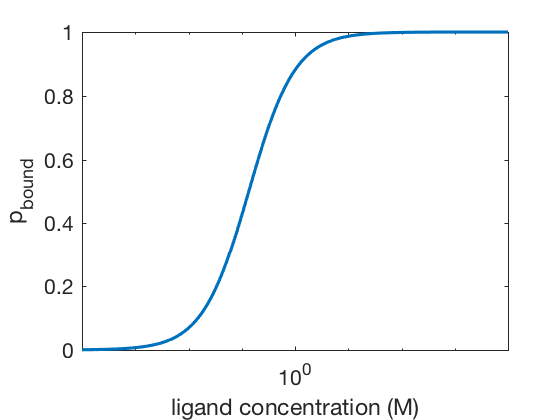

In [3]:
pbound = boundWeight ./ Z;

semilogx(C, pbound, 'LineWidth', 1.5);
xlabel('ligand concentration (M)')
ylabel('p_{bound}')

## Extra material: Learning how to use anonymous functions
Just for fun let's plot this probability but using different values of the binding energy.

It could be kind of painful to take different binding energies and then copy and paste the value, saving each probability independently. That's why for this section we will learn how to use the so-called [anonymous functions](http://www.mathworks.com/help/matlab/matlab_prog/anonymous-functions.html).

We will define a simple function that given a binding energy it computes the probability of the receptor being bound. The syntax for these functions is

`functionName = @(variable) operations_with_variable`.

In our case the variable we would feed to the function is the binding energy and the outcome would be $p_{\text{bound}}$.

In [13]:
% Define an anonyomous function to compute the probability of being bound
pboundFn = @(bindingEnergy) C .* exp(-bindingEnergy) / ...
                              (1 + C .* exp(-bindingEnergy));

Undefined function or variable 'bindingEnergy'.


Having define the function let's choose an array of different binding energies, and then use a `for` loop to compute the probability and then plot it all in a single clever loop.

In [10]:
pboundFn(-1)

ans =

    0.9999


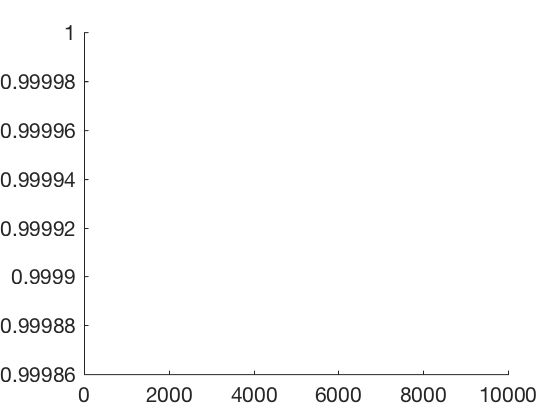

In [5]:
% Define an array of energies
d_ebArray = [-0.5, -1, -2, -4];

% Initialie a figure to plot the binding probabilities
figure
hold on
% Start a for loop to compute and plot the probability of the
% receptor being bound
for i=1:length(d_ebArray)
    pbound = pboundFn(d_ebArray(i));
    semilogx(C, pbound, 'LineWidth', 1.5)
    
end